In [ ]:
import datetime
import cv2
import numpy as np
import matplotlib.pyplot as plt

green_boundary = [np.array([10,110,62]),np.array([170,255,255])]
red_boundary = [np.array([0,60,75]),np.array([55,255,255])]
skyblue_boundary = [np.array([65,76,50]),np.array([95,255,255])]
blue_boundary = [np.array([110,115,62]),np.array([170,255,255])]
boundary = [green_boundary,red_boundary,skyblue_boundary,blue_boundary]


def coordinates(frame):

  a = datetime.datetime.now()
  results = model(frame)
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  temp = np.array(results.xyxy[0][0])
  image = frame[int(temp[1])-20:int(temp[3])+20,int(temp[0])-20:int(temp[2])+20,:]
  cv2.imwrite('im.jpg',image)
  # %matplotlib inline
  # plt.imshow(image)
  # plt.show()
  imag = image.copy()
  hsv = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
  points = []
  for m in range(len(boundary)):
    mask = cv2.inRange(hsv, boundary[m][0], boundary[m][1])
    img = image.copy()
    si = cv2.bitwise_and(img,img, mask = mask)

    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    cmax = np.array([])
    for contour in contours:
      if len(contour)>len(cmax):
        cmax = contour

    # output = cv2.drawContours(si, cmax, -1, (0,0,255),3)
    # plt.imshow(output)
    # plt.show()

    M = cv2.moments(cmax)
    if M['m00'] != 0:
      cx = int(M['m10']/M['m00'])
      cy = int(M['m01']/M['m00'])
      print(type(points))
      points.append([cx,cy])
  points = np.array(points)
  temp2 = np.array([int(temp[0])-20,int(temp[1])-20])
  points = points + temp2

  # for n in range(len(points)):
  #   cv2.circle(frame, points[n], 1, (0, 0, 255), -1)
  # plt.imshow(frame)
  # plt.show()
  return points

left_coordinates = coordinates(imgLeft)
right_coordinates = coordinates(imgRight)

print(left_coordinates)
print(right_coordinates)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
[[430 349]
 [367 349]
 [368 449]
 [430 349]]
[[451 348]
 [387 347]
 [388 450]
 [451 348]]


In [ ]:
disparities = []

for i in range(len(left_coordinates)):
  disparities = np.array(left_coordinates[:,0]) - np.array(right_coordinates[:,0])

disparities

# disparities = [topl[0]-topl2[0],topr[0]-topr2[0],botl[0]-botl2[0],botr[0]-botr2[0]]
# print(disparities)

array([-21, -20, -20, -21])

**Template Coordinate - (3.125, 1.2, -0.69)**

**TEST IMAGES**

**4th to 5th**

In [ ]:
# img_295 folder1
# l = [(246,171),(553,171),(246,624),(553,624)]
# r = [(322,168),(641,168),(320,631),(641,631)]
# l = np.array(l)
# r = np.array(r)
# disparities = l[:,0]-r[:,0]
# disparities

# actual_depth = 0.148 m 
# got = 0.1471


In [ ]:
# img_290 folder1
# l = [(338,220),(580,220),(338,576),(580,576)]
# r = [(282,230),(516,230),(282,568),(516,568)]
# l = np.array(l)
# r = np.array(r)
# disparities = l[:,0]-r[:,0]
# disparities

# actual_depth = 0.1966 m 
# got = 199.51 mm

array([56, 64, 56, 64])

In [ ]:
# img_170 folder2
# l = [(377,358),(440,350),(391,450),(453,440)]
# r = [(362,359),(424,350),(375,449),(437,440)]
# l = np.array(l)
# r = np.array(r)
# disparities = l[:,0]-r[:,0]
# disparities

# actual_depth = 1.356 m 
# got = 199.51 m

array([15, 16, 16, 16])

In [ ]:
# img_2 folder2
# l = [(392,394),(403,385),(404,413),(416,405)]
# r = [(388,394),(399,385),(400,413),(412,404)]
# l = np.array(l)
# r = np.array(r)
# disparities = l[:,0]-r[:,0]
# disparities

# actual_depth = 2.99 m 
# got = 2.97

array([4, 4, 4, 4])

In [ ]:
baseline = 25
# pixelsize = 1
# focalpixel = 1368.536
focalpixel = 476.7
depth = []
x = []
y = []
# disparities = [1]

for i in range(len(disparities)): 
  dist = ((focalpixel*baseline)/(abs(disparities[i])))
  # print(dist) 
  depth.append(dist)
  x1 = (dist*l[i][0])/focalpixel
  x.append(x1)
  y1 = (dist*l[i][1])/focalpixel
  y.append(y1)

x = np.array(x)
x = np.mean(x)/1000
y = np.array(y)
y = np.mean(y)/1000
depth = np.array(depth)
depth = np.mean(depth)/1000

# actualdepth = 1316
print("x - ",x," m")
print("y - ",y," m")
print("z - ",depth," m")

x -  0.48748511904761904  m
y -  0.4850446428571428  m
z -  0.5816875  m


**FOR IMAGE**

In [20]:
           #        FINAL CODE
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import datetime

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/best.pt' , force_reload=True)
model.conf = 0.45

imgLeft = cv2.imread('250left.jpg')
imgRight = cv2.imread('250right.jpg')

green_boundary = [np.array([10,110,62]),np.array([170,255,255])]
red_boundary = [np.array([0,60,75]),np.array([55,255,255])]
skyblue_boundary = [np.array([65,76,50]),np.array([95,255,255])]
blue_boundary = [np.array([110,115,62]),np.array([170,255,255])]
boundary = [green_boundary,red_boundary,skyblue_boundary,blue_boundary]


def coordinates(frame):

  a = datetime.datetime.now()
  results = model(frame)
  # frame =np.squeeze(model(frame).render())

  # im = np.squueze(results.render())
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  try:
    temp = np.array(results.xyxy[0][0])
    image = frame[int(temp[1])-20:int(temp[3])+20,int(temp[0])-20:int(temp[2])+20,:]
    return image
  except Exception as e:
    pass
  #   cv2.imwrite('im.jpg',image)
  # # except Exception as e:
  # #   return -1
  # # # %matplotlib inline
  # # # plt.imshow(image)
  # # # plt.show()
  # # imag = image.copy()
  # # hsv = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
  # # points = []
  # # for m in range(len(boundary)):
  # #   mask = cv2.inRange(hsv, boundary[m][0], boundary[m][1])
  # #   # color_thresh = mask
  # #   img = image.copy()
  # #   si = cv2.bitwise_and(img,img, mask = mask)

  # #   contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  # #   cmax = np.array([])
  # #   for contour in contours:
  # #     if len(contour)>len(cmax):
  # #       cmax = contour

  # #   # output = cv2.drawContours(si, cmax, -1, (0,0,255),3)
  # #   # plt.imshow(output)
  # #   # plt.show()

  # #   M = cv2.moments(cmax)
  # #   if M['m00'] != 0:
  # #     cx = int(M['m10']/M['m00'])
  # #     cy = int(M['m01']/M['m00'])
  # #     # print(type(points))
  # #     points.append([cx,cy])
  # # points = np.array(points)
  # # temp2 = np.array([int(temp[0])-20,int(temp[1])-20])
  # # points = points + temp2

  # # # for n in range(len(points)):
  # # #   cv2.circle(frame, points[n], 1, (0, 0, 255), -1)
  # # # plt.imshow(frame)
  # # # plt.show()
  # # return points

left_coordinates = coordinates(imgLeft)
right_coordinates = coordinates(imgRight)
cv2.imwrite('image1.jpg',left_coordinates)
cv2.imwrite('image2.jpg',left_coordinates)


# disparities = []

# for i in range(len(left_coordinates)):
#   disparities = np.array(left_coordinates[:,0]) - np.array(right_coordinates[:,0])

# # print("disparities",disparities)

# baseline = 25
# # pixelsize = 1
# # focalpixel = 1368.536
# focalpixel = 476.7
# depth = []
# # disparities = [1]

# for i in range(len(disparities)): 
#   dist = ((focalpixel*baseline)/(abs(disparities[i])))
# # print(dist) 

# depth.append(dist)

# depth = np.array(depth)
# depth = np.mean(depth)/1000

# print(depth)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-5 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients
Adding AutoShape... 


True

**VIDEO PE YOLO**

In [ ]:
           #        FINAL CODE
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import datetime

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/best.pt' , force_reload=True)
model.conf = 0.45

vidLeft = cv2.VideoCapture('/content/line0.avi')
vidRight = cv2.VideoCapture('/content/line1.avi')

green_boundary = [np.array([10,110,62]),np.array([170,255,255])]
red_boundary = [np.array([0,60,75]),np.array([55,255,255])]
skyblue_boundary = [np.array([65,76,50]),np.array([95,255,255])]
blue_boundary = [np.array([110,115,62]),np.array([170,255,255])]
boundary = [green_boundary,red_boundary,skyblue_boundary,blue_boundary]

def coordinates(frame):

  a = datetime.datetime.now()
  results = model(frame)
  # im = np.squueze(results.render())
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  try:
    temp = np.array(results.xyxy[0][0])
    image = frame[int(temp[1])-20:int(temp[3])+20,int(temp[0])-20:int(temp[2])+20,:]
    cv2.imwrite('im.jpg',image)
  except Exception as e:
    return -1
  # %matplotlib inline
  # plt.imshow(image)
  # plt.show()
  imag = image.copy()
  hsv = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
  points = []
  for m in range(len(boundary)):
    mask = cv2.inRange(hsv, boundary[m][0], boundary[m][1])
    img = image.copy()
    si = cv2.bitwise_and(img,img, mask = mask)

    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    cmax = np.array([])
    for contour in contours:
      if len(contour)>len(cmax):
        cmax = contour

    # output = cv2.drawContours(si, cmax, -1, (0,0,255),3)
    # plt.imshow(output)
    # plt.show()

    M = cv2.moments(cmax)
    if M['m00'] != 0:
      cx = int(M['m10']/M['m00'])
      cy = int(M['m01']/M['m00'])
      # print(type(points))
      points.append([cx,cy])
  points = np.array(points)
  temp2 = np.array([int(temp[0])-20,int(temp[1])-20])
  points = points + temp2

  # for n in range(len(points)):
  #   cv2.circle(frame, points[n], 1, (0, 0, 255), -1)
  # plt.imshow(frame)
  # plt.show()
  return points

# left_coordinates = coordinates(imgLeft)
# right_coordinates = coordinates(imgRight)

actual = np.linspace(3, 0.1, 300)
count = 0
depths = np.ones(300)*3

frame_width = int(vidLeft.get(3))
frame_height = int(vidLeft.get(4))
   
size = (frame_width, frame_height)

# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('final_output.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

while True:
  if(count == 299):
    break
  try:
    ret1, frame1 = vidLeft.read() 
    ret2, frame2 = vidRight.read() 
    if frame1 is None:
      break
    if frame2 is None:
      break
    # xl = frame1.shape[0]
    # yl = frame1.shape[1]
        
    # xr = frame2.shape[0]
    # yr = frame2.shape[1]

    # frame_size = (y,x)

    # # Create a VideoWriter object to write the output video
    # fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    # video_writer = cv2.VideoWriter('output_final_draft.avi', fourcc, 20, frame_size)

    # # Loop through the images in the numpy array and write them to the video
    # for image in video:
    #   video_writer.write(image)

    # # Release the VideoWriter object
    # video_writer.release()

    left_coordinates = coordinates(frame1)
    if(len(left_coordinates) != 4):
      continue
    right_coordinates = coordinates(frame2)
    if(len(right_coordinates) != 4):
      continue
    # print(left_coordinates)
    # print(right_coordinates)

    disparities = []

    for i in range(len(left_coordinates)):
      disparities = np.array(left_coordinates[:,0]) - np.array(right_coordinates[:,0])

    # print("disparities",disparities)

    baseline = 25
    # pixelsize = 1
    # focalpixel = 1368.536
    focalpixel = 476.7
    depth = []
    # disparities = [1]

    for i in range(len(disparities)): 
      dist = ((focalpixel*baseline)/(abs(disparities[i])))
    # print(dist) 

    depth.append(dist)

    depth = np.array(depth)
    depth = np.mean(depth)/1000

    # actualdepth = 1316
    print(depth)
    depths[count] = depth
  except Exception as e:
    print(e)
    continue
  frame1 =np.squeeze(model(frame1).render())
  cv2.putText(frame1, "Actual Depth:" + str(actual[count]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)
  cv2.putText(frame1, "Measured Depth:" + str(depth), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)
  cv2.putText(frame1, "Error in Depth:" + str(np.abs(actual[count] - depth)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)

  # Screen reflection #############################################################
  # cv2.imshow('Hand Gesture Recognition', image)
  # cv2.imwrite()
  result.write(frame1)
  count = count + 1

vidLeft.release()
result.release()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-5 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients
Adding AutoShape... 


object of type 'int' has no len()
object of type 'int' has no len()
object of type 'int' has no len()
object of type 'int' has no len()
2.979375
2.979375
2.979375
2.979375
2.979375
2.3835
2.3835
2.3835
2.3835
2.979375
3.9725
2.979375
2.979375
2.979375
2.979375
2.979375
2.3835
2.979375
2.979375
2.3835
2.979375
2.3835
2.3835
2.3835
2.979375
2.979375
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.979375
2.979375
2.979375
2.979375
2.979375
2.3835
2.3835
2.3835
2.979375
2.979375
2.979375
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
1.98625
2.3835
2.3835
1.98625
2.3835
1.98625
2.3835
2.3835
2.3835
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.7025
1.7025
1.98625
1.98625
1.98625
1.98625
1.7025
1.7025
1.7025
1.7025
1.7025
1.7025
1.7025
1.7025
1.98625
1.986

**VIDEO PE COLOR THRESHOLDING**

In [ ]:
           #        FINAL CODE
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import datetime

model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/best.pt' , force_reload=True)
model.conf = 0.45

vidLeft = cv2.VideoCapture('/content/line0.avi')
vidRight = cv2.VideoCapture('/content/line1.avi')

green_boundary = [np.array([10,110,62]),np.array([170,255,255])]
red_boundary = [np.array([0,60,75]),np.array([55,255,255])]
skyblue_boundary = [np.array([65,76,50]),np.array([95,255,255])]
blue_boundary = [np.array([110,115,62]),np.array([170,255,255])]
boundary = [green_boundary,red_boundary,skyblue_boundary,blue_boundary]



def coordinates(frame):

  a = datetime.datetime.now()
  results = model(frame)
  # im = np.squueze(results.render())
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  try:
    temp = np.array(results.xyxy[0][0])
    image = frame[int(temp[1])-20:int(temp[3])+20,int(temp[0])-20:int(temp[2])+20,:]
    cv2.imwrite('im.jpg',image)
  except Exception as e:
    return -1
  # %matplotlib inline
  # plt.imshow(image)
  # plt.show()
  imag = image.copy()
  hsv = cv2.cvtColor(imag, cv2.COLOR_BGR2HSV)
  points = []
  for m in range(len(boundary)):
    mask = cv2.inRange(hsv, boundary[m][0], boundary[m][1])
    # color_thresh = mask
    img = image.copy()
    si = cv2.bitwise_and(img,img, mask = mask)

    contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

    cmax = np.array([])
    for contour in contours:
      if len(contour)>len(cmax):
        cmax = contour

    # output = cv2.drawContours(si, cmax, -1, (0,0,255),3)
    # plt.imshow(output)
    # plt.show()

    M = cv2.moments(cmax)
    if M['m00'] != 0:
      cx = int(M['m10']/M['m00'])
      cy = int(M['m01']/M['m00'])
      # print(type(points))
      points.append([cx,cy])
  points = np.array(points)
  temp2 = np.array([int(temp[0])-20,int(temp[1])-20])
  points = points + temp2

  # for n in range(len(points)):
  #   cv2.circle(frame, points[n], 1, (0, 0, 255), -1)
  # plt.imshow(frame)
  # plt.show()
  return points

# left_coordinates = coordinates(imgLeft)
# right_coordinates = coordinates(imgRight)

actual = np.linspace(3, 0.1, 300)
count = 0
depths = np.ones(300)*3

frame_width = int(vidLeft.get(3))
frame_height = int(vidLeft.get(4))
   
size = (frame_width, frame_height)

# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('final_output.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

while True:
  if(count == 299):
    break
  try:
    ret1, frame1 = vidLeft.read() 
    ret2, frame2 = vidRight.read() 
    if frame1 is None:
      break
    if frame2 is None:
      break
    # xl = frame1.shape[0]
    # yl = frame1.shape[1]
        
    # xr = frame2.shape[0]
    # yr = frame2.shape[1]

    # frame_size = (y,x)

    # # Create a VideoWriter object to write the output video
    # fourcc = cv2.VideoWriter_fourcc(*'MJPG')
    # video_writer = cv2.VideoWriter('output_final_draft.avi', fourcc, 20, frame_size)

    # # Loop through the images in the numpy array and write them to the video
    # for image in video:
    #   video_writer.write(image)

    # # Release the VideoWriter object
    # video_writer.release()

    left_coordinates = coordinates(frame1)
    if(len(left_coordinates) != 4):
      continue
    right_coordinates = coordinates(frame2)
    if(len(right_coordinates) != 4):
      continue
    # print(left_coordinates)
    # print(right_coordinates)

    disparities = []

    for i in range(len(left_coordinates)):
      disparities = np.array(left_coordinates[:,0]) - np.array(right_coordinates[:,0])

    # print("disparities",disparities)

    baseline = 25
    # pixelsize = 1
    # focalpixel = 1368.536
    focalpixel = 476.7
    depth = []
    # disparities = [1]

    for i in range(len(disparities)): 
      dist = ((focalpixel*baseline)/(abs(disparities[i])))
    # print(dist) 

    depth.append(dist)

    depth = np.array(depth)
    depth = np.mean(depth)/1000

    # actualdepth = 1316
    print(depth)
    depths[count] = depth
  except Exception as e:
    print(e)
    continue
  # frame1 =np.squeeze(model(frame1).render())
  # for n in range(len(left_coordinates)):
  #   cv2.circle(frame1, left_coordinates[n], 4, (0, 0, 255), -1)
  # for n in range(len(right_coordinates)):
  #   cv2.circle(frame1, right_coordinates[n], 4, (0, 0, 255), -1)
  cv2.putText(frame1, "Actual Depth:" + str(actual[count]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)
  cv2.putText(frame1, "Measured Depth:" + str(depth), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)
  cv2.putText(frame1, "Error in Depth:" + str(np.abs(actual[count] - depth)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)

  # Screen reflection #############################################################
  # cv2.imshow('Hand Gesture Recognition', image)
  # cv2.imwrite()
  result.write(frame1)
  count = count + 1

vidLeft.release()
result.release()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-5 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients
Adding AutoShape... 


object of type 'int' has no len()
object of type 'int' has no len()
object of type 'int' has no len()
object of type 'int' has no len()
2.979375
2.979375
2.979375
2.979375
2.979375
2.3835
2.3835
2.3835
2.3835
2.979375
3.9725
2.979375
2.979375
2.979375
2.979375
2.979375
2.3835
2.979375
2.979375
2.3835
2.979375
2.3835
2.3835
2.3835
2.979375
2.979375
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.979375
2.979375
2.979375
2.979375
2.979375
2.3835
2.3835
2.3835
2.979375
2.979375
2.979375
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
2.3835
1.98625
2.3835
2.3835
1.98625
2.3835
1.98625
2.3835
2.3835
2.3835
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.98625
1.7025
1.7025
1.98625
1.98625
1.98625
1.98625
1.7025
1.7025
1.7025
1.7025
1.7025
1.7025
1.7025
1.7025
1.98625
1.986

In [2]:
import matplotlib.pyplot as plt
import numpy as np
actual = np.linspace(3, 0.1, 300)
# print(actual)
predict = depths
frames = np.linspace(0, 300, 300)
%matplotlib inline
plt.plot(frames,actual)
plt.plot(frames,predict)

# plt.plot(frames,actual)
# plt.plot(frames,predict)
plt.show()

NameError: ignored

**SIFT**

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import torch
import datetime

# vidLeft = cv2.VideoCapture('/content/line0.avi')
# vidRight = cv2.VideoCapture('/content/line1.avi')

model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'best.pt' , force_reload=True)

actual = np.linspace(3, 0.1, 300)
count = 0
depths = np.ones(300)*3

frame_width = int(vidLeft.get(3))
frame_height = int(vidLeft.get(4))
   
size = (frame_width, frame_height)

# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('final_output.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         10, size)

def yolo(frame):
  a = datetime.datetime.now()
  results = model(frame)
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  try:
    temp = np.array(results.xyxy[0][0])
    image = frame[int(temp[1])-20:int(temp[3])+20,int(temp[0])-20:int(temp[2])+20,:]
    cv2.imwrite('im.jpg',image)
  except Exception as e:
    return -1
  return temp


def coordinates2(frame1,frame2):

  a = datetime.datetime.now()
  results = model(frame1)
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  try:
    temp1 = np.array(results.xyxy[0][0])
    img1 = frame1[int(temp1[1])-20:int(temp1[3])+20,int(temp1[0])-20:int(temp1[2])+20,:]
  except Exception as e:
    return -1, -1

  sift = cv2.xfeatures2d.SIFT_create()

  ## Create flann matcher
  FLANN_INDEX_KDTREE = 1  # bug: flann enums are missing
  flann_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  #matcher = cv2.FlannBasedMatcher_create()
  matcher = cv2.FlannBasedMatcher(flann_params, {})

  gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  kpts1, descs1 = sift.detectAndCompute(gray1,None)

  a = datetime.datetime.now()
  results = model(frame2)
  # print(results)
  b = datetime.datetime.now()
  delta = b - a
  try:
    temp2 = np.array(results.xyxy[0][0])
    img2 = frame2[int(temp2[1])-20:int(temp2[3])+20,int(temp2[0])-20:int(temp2[2])+20,:]
  except Exception as e:
    return -1


  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  kpts2, descs2 = sift.detectAndCompute(gray2,None)

  ## Ratio test
  matches = matcher.knnMatch(descs1, descs2, 2)
  matchesMask = [[0,0] for i in range(len(matches))]

  points1 = []
  points2 = []

  for i, (m1,m2) in enumerate(matches):
      if m1.distance < 0.7 * m2.distance:
          matchesMask[i] = [1,0]
          ## Notice: How to get the index
          pt1 = kpts1[m1.queryIdx].pt
          pt2 = kpts2[m1.trainIdx].pt
          points1.append(pt1)
          points2.append(pt2)
          # print(i, pt1,pt2 )



  points1 = np.array(points1)
  temp1 = np.array([int(temp1[0])-20,int(temp1[1])-20])
  points1 = points1 + temp1

  points2 = np.array(points2)
  temp2 = np.array([int(temp2[0])-20,int(temp2[1])-20])
  points2 = points2 + temp2

  return points1, points2

# left_coordinates = coordinates(imgLeft)
# right_coordinates = coordinates(imgRight)

count=0
vidLeft = cv2.VideoCapture('line0.avi')
vidRight = cv2.VideoCapture('line1.avi')

actual = np.linspace(3, 0.1, 300)
count = 0
depths = np.ones(300)*3
bias = 0.044-0.03819858837284849

while True:

  ret1, frame1 = vidLeft.read() 
  ret2, frame2 = vidRight.read() 

  if(count < 200):
 
    count = count + 1
    continue


  if not ret1:
    print("d")
    break
  if not ret2:
    print("d2")
    break


  left_coordinates,right_coordinates = coordinates2(frame1,frame2)
  # print(left_coordinates)
  # print(right_coordinates)

  if type(left_coordinates) ==int:
    continue

  disparities = []

  for i in range(len(left_coordinates)):
    disparities = np.array(left_coordinates[:,0]) - np.array(right_coordinates[:,0])

  print(disparities)


  a = disparities
  ## REMOVE OUTLIERS
  mean = np.mean(a)
  std_dev = np.std(a)
  # 3. Normalize array around 0
  zero_based = abs(a - mean)
  # 4. Define maximum number of standard deviations
  max_deviations = 1
  # 5. Access only non-outliers using Boolean Indexing
  no_outliers = a[zero_based < max_deviations * std_dev]
  print(no_outliers)

  disparities = no_outliers

  # print("disparities",disparities)

  baseline = 25
  # pixelsize = 1
  # focalpixel = 1368.536
  focalpixel = 476.7
  depth = []
  # disparities = [1]



  for i in range(len(disparities)): 
    dist = ((focalpixel*baseline)/(abs(disparities[i])))
  # print(dist) 

  depth.append(dist)

  depth = np.array(depth)
  depth = np.mean(depth)/1000
  depth+=bias
  # actualdepth = 1316
  print(depth)
  depths[count] = depth
  frame1 =np.squeeze(model(frame1).render())
  cv2.putText(frame1, "Actual Depth:" + str(actual[count]), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)
  cv2.putText(frame1, "Measured Depth:" + str(depth), (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)
  cv2.putText(frame1, "Error in Depth:" + str(np.abs(actual[count] - depth)), (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_AA)

  # Screen reflection #############################################################
  # cv2.imshow('Hand Gesture Recognition', image)
  # cv2.imwrite()
  result.write(frame1)
  count = count + 1


vidLeft.release()
result.release()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-6 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients
Adding AutoShape... 


[    -11.341      -11.08     -11.019     -11.297     -11.228     -11.228     -11.231     -11.313]
[    -11.297     -11.228     -11.228     -11.231     -11.313]
1.0592351843490901
[    -11.355     -11.174      -11.13      -11.13     -11.805     -11.347     -11.504     -10.928      23.442     -11.523     -11.456]
[    -11.355     -11.174      -11.13      -11.13     -11.805     -11.347     -11.504     -10.928     -11.523     -11.456]
1.0460560726429717
[    -11.683      -10.82      -11.26     -11.204     -11.204       -11.5     -10.777     -40.542     -11.144      18.249     -12.081     -11.372     -11.578     -11.321      23.982]
[    -11.683      -10.82      -11.26     -11.204     -11.204       -11.5     -10.777     -11.144     -12.081     -11.372     -11.578     -11.321]
1.0585018242696607
[    -11.278     -47.114     -11.639     -11.416     -11.416     -11.248     -11.248     -11.448     -12.072     -11.402     -11.178      -11.59     -11.728      -11.69     -12.028     -11.319      1

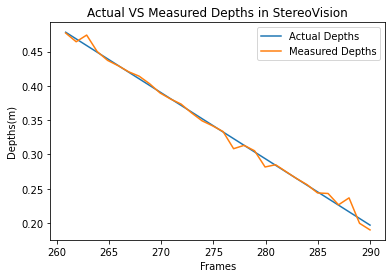

In [43]:
import matplotlib.pyplot as plt
import numpy as np
actual = np.linspace(3, 0.1, 300)
# print(actual)
predict = depths
frames = np.linspace(0, 300, 300)
%matplotlib inline
plt.plot(frames[260:290],actual[260:290], label = "Actual Depths")
plt.plot(frames[260:290],predict[260:290], label = "Measured Depths")

# plt.plot(actual[260:290],predict[260:290])

# plt.plot(frames,actual)
# plt.plot(frames,predict)

# naming the x axis
plt.xlabel('Frames')
# naming the y axis
plt.ylabel('Depths(m)')
  
# giving a title to my graph
plt.title('Actual VS Measured Depths in StereoVision')
plt.legend()

plt.show()

In [42]:
np.mean(actual[260:290] - predict[260:290])

-2.312964634635743e-17